<h2><b>[개인 과제]</b></h2>

````
# 미국 Boston 지역의 집값 data 불러오기
import pandas as pd
house = pd.read_csv('https://raw.githubusercontent.com/rasbt/'
                     'python-machine-learning-book-2nd-edition'
                     '/master/code/ch10/housing.data.txt',header=None,sep='\s+')
house.columns = ['CRIM', 'ZN', 'INDUS', 'CHAS','NOX', 'RM', 'AGE', 'DIS', 'RAD','TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']
house.head()
````


<h3>Ridge, Lasso, ElasticNet을 사용해 alpha의 값 변화에 따른 MEDV를 예측하는 변수들의 계수 변화를 시각화해보세요.</h3>

[<h3>참고 코드</h3>](https://datascienceschool.net/03%20machine%20learning/06.05%20%EC%A0%95%EA%B7%9C%ED%99%94%20%EC%84%A0%ED%98%95%ED%9A%8C%EA%B7%80.html)



<br>

**<h3><조건></h3>**

<h3>1. X(독립변수 data)에 Standard Scaler 적용하기 </h3>

<br>

**<h3><참고></h3>**

<h3>Ridge와 Lasso에서 상수항이 축소되지 않는 이유</h3>

[<h3>참고 블로그</h3>](https://rpago.tistory.com/59)


In [9]:
# The normal imports
import numpy as np # efficient numerical computations
import pandas as pd # data structures for data analysis
from numpy.random import randn

# These are the plotting modules adn libraries
import matplotlib as mpl # plotting (both interactive and to files)
import matplotlib.pyplot as plt
import seaborn as sns # extra plot types, elegant and readable plot style

# machine learning algorithms, dataset access
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV, cross_val_score, KFold
from sklearn.preprocessing import StandardScaler, RobustScaler, MinMaxScaler, MaxAbsScaler
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import make_pipeline
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, r2_score, mean_squared_error
from sklearn.datasets import load_boston
from sklearn.linear_model import LinearRegression, RANSACRegressor, ElasticNet, Ridge, Lasso

sns.set_style('whitegrid')

# Command so that plots appear in the iPython Notebook
get_ipython().run_line_magic('matplotlib', 'inline')

In [10]:
# 미국 Boston 지역의 집값 data 불러오기
# 미국 Boston 지역의 집값 data 불러오기
import pandas as pd
house = pd.read_csv('https://raw.githubusercontent.com/rasbt/'
                     'python-machine-learning-book-2nd-edition'
                     '/master/code/ch10/housing.data.txt',header=None,sep='\s+')
house.columns = ['CRIM', 'ZN', 'INDUS', 'CHAS','NOX', 'RM', 'AGE', 'DIS', 'RAD','TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']
house.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [11]:
# 독립 변수, 종속 변수 지정

X=house[['CRIM', 'ZN', 'INDUS', 'NOX', 'RM', 'AGE', 'DIS', 'TAX', 'PTRATIO', 'B', 'LSTAT']]
y=house[['MEDV']]

# 정규화(전체 dataset에 대해 Scaling 진행.)
scaler=StandardScaler()
X_scaled=scaler.fit_transform(X)

In [12]:
# alpha 값에 따른 계수 변화(Ridge)
alpha = np.logspace(-3, 1, 5)

data = []
for i, a in enumerate(alpha):
    ridge = Ridge(alpha=a).fit(X_scaled, y)
    ridge.coef_1=np.concatenate(ridge.coef_).tolist()
    data.append(pd.Series(np.hstack([ridge.intercept_, ridge.coef_1])))
    #print(ridge.intercept_)

df_ridge = pd.DataFrame(data, index=alpha).T
df_ridge.drop(index=0, axis=0)

,0.001,0.010,0.100,1.000,10.000
1,-0.602383,-0.602368,-0.602221,-0.600774,-0.588771
2,0.929390,0.929320,0.928625,0.921750,0.859738
3,-0.287726,-0.287727,-0.287739,-0.287877,-0.290779
4,-1.687746,-1.687556,-1.685665,-1.666987,-1.501270
5,2.939830,2.939856,2.940115,2.942632,2.961488
6,-0.052531,-0.052550,-0.052739,-0.054609,-0.070969
7,-3.161513,-3.161264,-3.158774,-3.134119,-2.909732
8,0.140313,0.140233,0.139434,0.131546,0.061512
9,-1.889901,-1.889863,-1.889482,-1.885701,-1.851103
10,0.806484,0.806487,0.806512,0.806752,0.807874


In [13]:
# alpha 값에 따른 계수 변화(Lasso)
alpha = np.logspace(-3, 1, 5)

data = []
for i, a in enumerate(alpha):
    lasso = Lasso(alpha=a).fit(X_scaled, y)
    
    data.append(pd.Series(np.hstack([lasso.intercept_, lasso.coef_])))

df_lasso = pd.DataFrame(data, index=alpha).T
df_lasso.drop(index=0, axis=0)

,0.001,0.010,0.100,1.000,10.000
1,-0.599709,-0.575196,-0.468970,-0.000000,-0.0
2,0.928047,0.914682,0.663783,0.000000,0.0
3,-0.283808,-0.246570,-0.097257,-0.000000,-0.0
4,-1.682934,-1.639010,-1.341018,-0.000000,-0.0
5,2.940166,2.944162,2.974071,2.713352,0.0
6,-0.050366,-0.032073,-0.000000,-0.000000,-0.0
7,-3.153852,-3.082985,-2.453958,-0.000000,0.0
8,0.133366,0.069993,-0.000000,-0.000000,-0.0
9,-1.888048,-1.871745,-1.850519,-1.343548,-0.0
10,0.805318,0.795156,0.749972,0.180954,0.0


In [14]:
# alpha 값에 따른 계수 변화(ElasticNet)
alpha = np.logspace(-3, 1, 5)

data = []
for i, a in enumerate(alpha):
    elasticnet = ElasticNet(alpha=a).fit(X_scaled, y)
    
    data.append(pd.Series(np.hstack([elasticnet.intercept_, elasticnet.coef_])))

df_elasticnet = pd.DataFrame(data, index=alpha).T
df_elasticnet.drop(index=0, axis=0)

,0.001,0.010,0.100,1.000,10.000
1,-0.600647,-0.585277,-0.531592,-0.352666,-0.000000
2,0.926786,0.903556,0.669305,0.066465,0.000000
3,-0.285843,-0.268760,-0.244716,-0.234977,-0.000000
4,-1.680078,-1.612530,-1.190380,-0.207850,-0.000000
5,2.940711,2.948282,2.968491,2.384196,0.203314
6,-0.051974,-0.047179,-0.000000,-0.000000,-0.000000
7,-3.150754,-3.055384,-2.297972,-0.000000,0.000000
8,0.134636,0.084394,-0.031431,-0.324614,-0.000000
9,-1.887906,-1.870406,-1.797817,-1.298200,-0.000000
10,0.805967,0.801393,0.778814,0.476117,0.000000


NameError: ignored

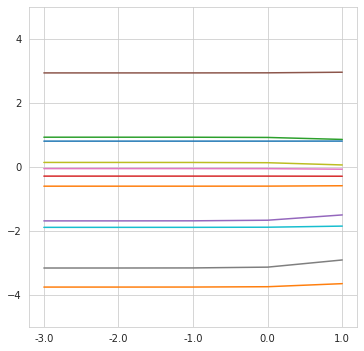

In [15]:
# 시각화
plt.figure(figsize=(20,20))

ax1=plt.subplot(3,3,1)
plt.semilogx(df_ridge.T)
plt.xticks(alpha, labels=np.log10(alpha))
plt.ylim([-5,5])
splt.title("Ridge")


ax2 = plt.subplot(3,3,2)
plt.semilogx(df_lasso.T)
plt.xticks(alpha, labels=np.log10(alpha))
plt.ylim([-4,3])
plt.title("Lasso")

ax2 = plt.subplot(3,3,3)
plt.semilogx(df_elasticnet.T)
plt.xticks(alpha, labels=np.log10(alpha))
plt.ylim([-4,3])
plt.title("ElasticNet")

plt.show()